# Proje 2

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

- İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
- Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
- IMDB puanı en yüksek olan ilk 10 film hangileridir?
- Hangi yılın toplam "runtime" süresi en fazladır?
- Her bir dilin en fazla kullanıldığı "Genre" nedir?
- Veri setinde outlier veri var mıdır? Açıklayınız.
- Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
- 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
- IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
- IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
- 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
- Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
- Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('NetflixOriginals.csv', encoding="latin-1" )

In [178]:
df.head()
# df.tail()   df.describe()


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


### 1.  İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [3]:
ingilizce_filmler = df[df["Language"] == "English"].groupby("Genre") # Filmelerden İngilizce olanları, türüne göre grupladık
en_yuksek = ingilizce_filmler["IMDB Score"].max().reset_index(name = 'Maksimum') # IMDB skoru en yüksek olanları yeni bir sutunda indexliyoruz
en_yuksek.sort_values('Maksimum', ascending=False)

,Genre,Maksimum
40,Documentary,9.0
67,One-man show,8.5
35,Concert Film,8.4
16,Animation/Christmas/Comedy/Adventure,8.2
41,Drama,7.9
...,...,...
20,Anime / Short,4.7
88,Superhero-Comedy,4.4
68,Political thriller,4.3
65,Musical/Western/Fantasy,3.9


### 2. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [4]:
hint_filmler = df[df["Language"] == "Hindi"]
ortalama = hint_filmler["Runtime"].mean()
ortalama

115.78787878787878

### 3. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [35]:
df['Language'].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

### 4. IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [6]:
df.sort_values("IMDB Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
571,13th,Documentary,"October 7, 2016",100,8.2,English


### 5.  Hangi yılın toplam "runtime" süresi en fazladır?

In [15]:
df["Date"] = pd.to_datetime(df.Premiere)
df['Yıl'] = df['Date'].dt.year
df["Yıl"]

0      2019
1      2020
2      2019
3      2018
4      2020
       ... 
579    2018
580    2015
581    2018
582    2020
583    2020
Name: Yıl, Length: 584, dtype: int64

In [25]:
toplam_sureler = df.groupby("Yıl")["Runtime"].sum().sort_values(ascending=False).reset_index(name="Toplam Süre")
toplam_sureler

,Yıl,Toplam Süre
0,2020,17384
1,2019,10856
2,2018,9405
3,2021,7214
4,2017,6129
5,2016,2766
6,2015,814
7,2014,81


### 6. Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [29]:
df.groupby("Language")["Genre"].max()

Language
Bengali                                        Documentary
Dutch                                      Romantic comedy
English                                       Zombie/Heist
English/Akan                                     War drama
English/Arabic                                 Documentary
English/Hindi                                  Documentary
English/Japanese                               Documentary
English/Korean                            Action-adventure
English/Mandarin                               Documentary
English/Russian                                Documentary
English/Spanish                                Documentary
English/Swedish                                Documentary
English/Taiwanese/Mandarin                           Drama
English/Ukranian/Russian                       Documentary
Filipino                                          Thriller
French                                            Thriller
Georgian                                       

### 7. Veri setinde outlier veri var mıdır? Açıklayınız.

Kutu grafiğinde en solda ve en sağda nokta ile belirtilen değerler aykırı veri olarak değerlendirilir.

<AxesSubplot:xlabel='IMDB Score'>

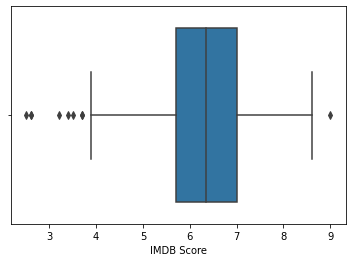

In [33]:
sns.boxplot(x = df["IMDB Score"])

- Yukarıdaki IMDB skorları grafiğinde en solda ve en sağda nokta ile belirtilen skorlar aykırı veri olarak değerlendirilebilir.

<AxesSubplot:xlabel='Runtime'>

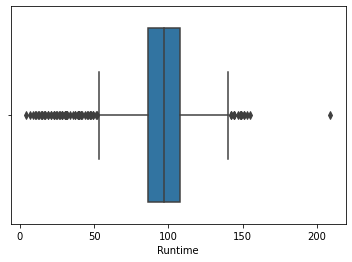

In [34]:
sns.boxplot(x = df["Runtime"])

- Sürelere ait grafikte daha fazla aykırı veri görülüyor.

### 8. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [179]:
uzun_sureli_filmler = df[df['Runtime'] > 100]["Language"].value_counts()
uzun_sureli_filmler

English                 146
Hindi                    26
Spanish                  13
Indonesian                6
Korean                    5
Italian                   5
Portuguese                4
Japanese                  4
French                    4
Marathi                   3
Polish                    2
Turkish                   2
German                    2
Thai                      1
Filipino                  1
Malay                     1
English/Japanese          1
Spanish/Catalan           1
Dutch                     1
Khmer/English/French      1
Tamil                     1
English/Korean            1
English/Arabic            1
English/Akan              1
Name: Language, dtype: int64

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'En çok kullanılan Diller')

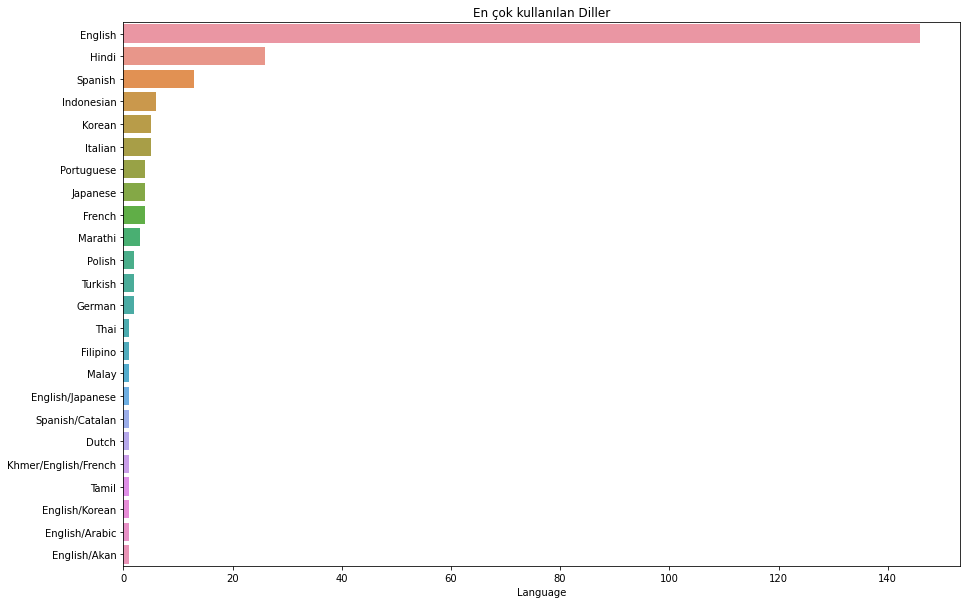

In [180]:
plt.figure(figsize=(15,10))
sns.barplot(uzun_sureli_filmler, uzun_sureli_filmler.index)
plt.title('En çok kullanılan Diller')

### 9. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [44]:
turler = df["Genre"].value_counts()  # Length: 115 olduğu için 115 kategori var.
turler

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Film Türleri')

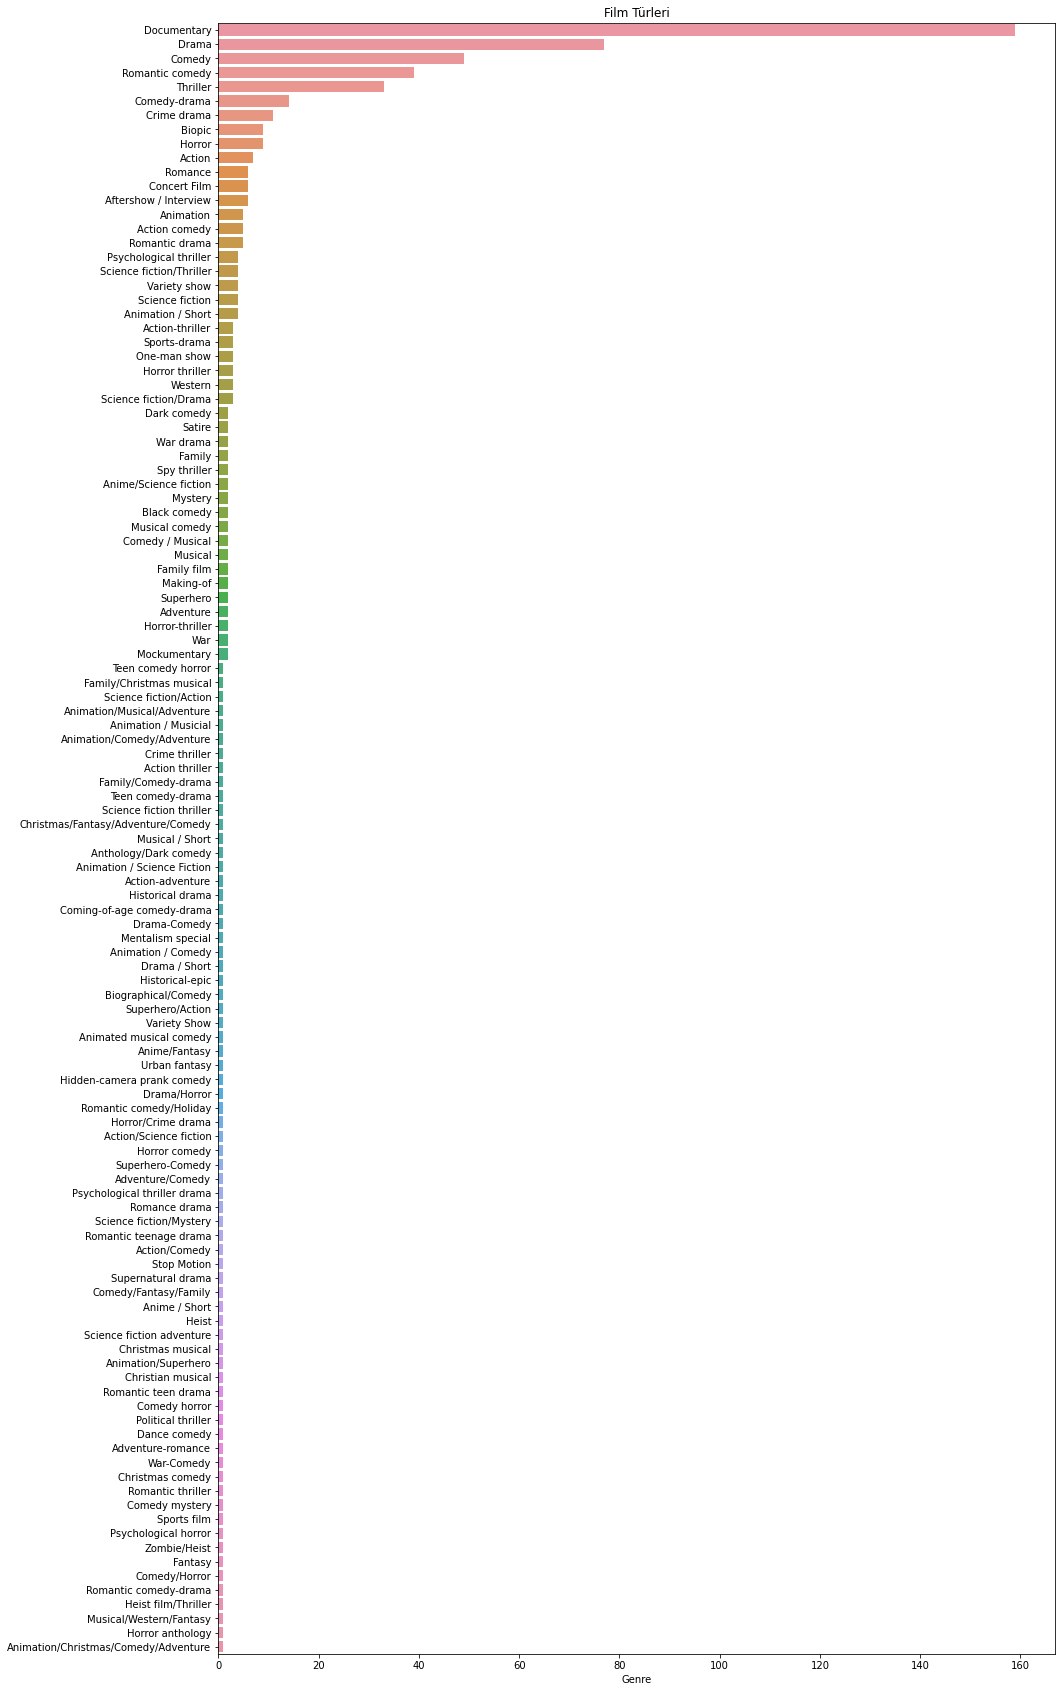

In [45]:
plt.figure(figsize=(15,30))
sns.barplot(turler, turler.index)
plt.title('Film Türleri')

### 10. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [81]:
df_korelasyon = df[["IMDB Score", "Runtime"]]
df_korelasyon.corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


<AxesSubplot:>

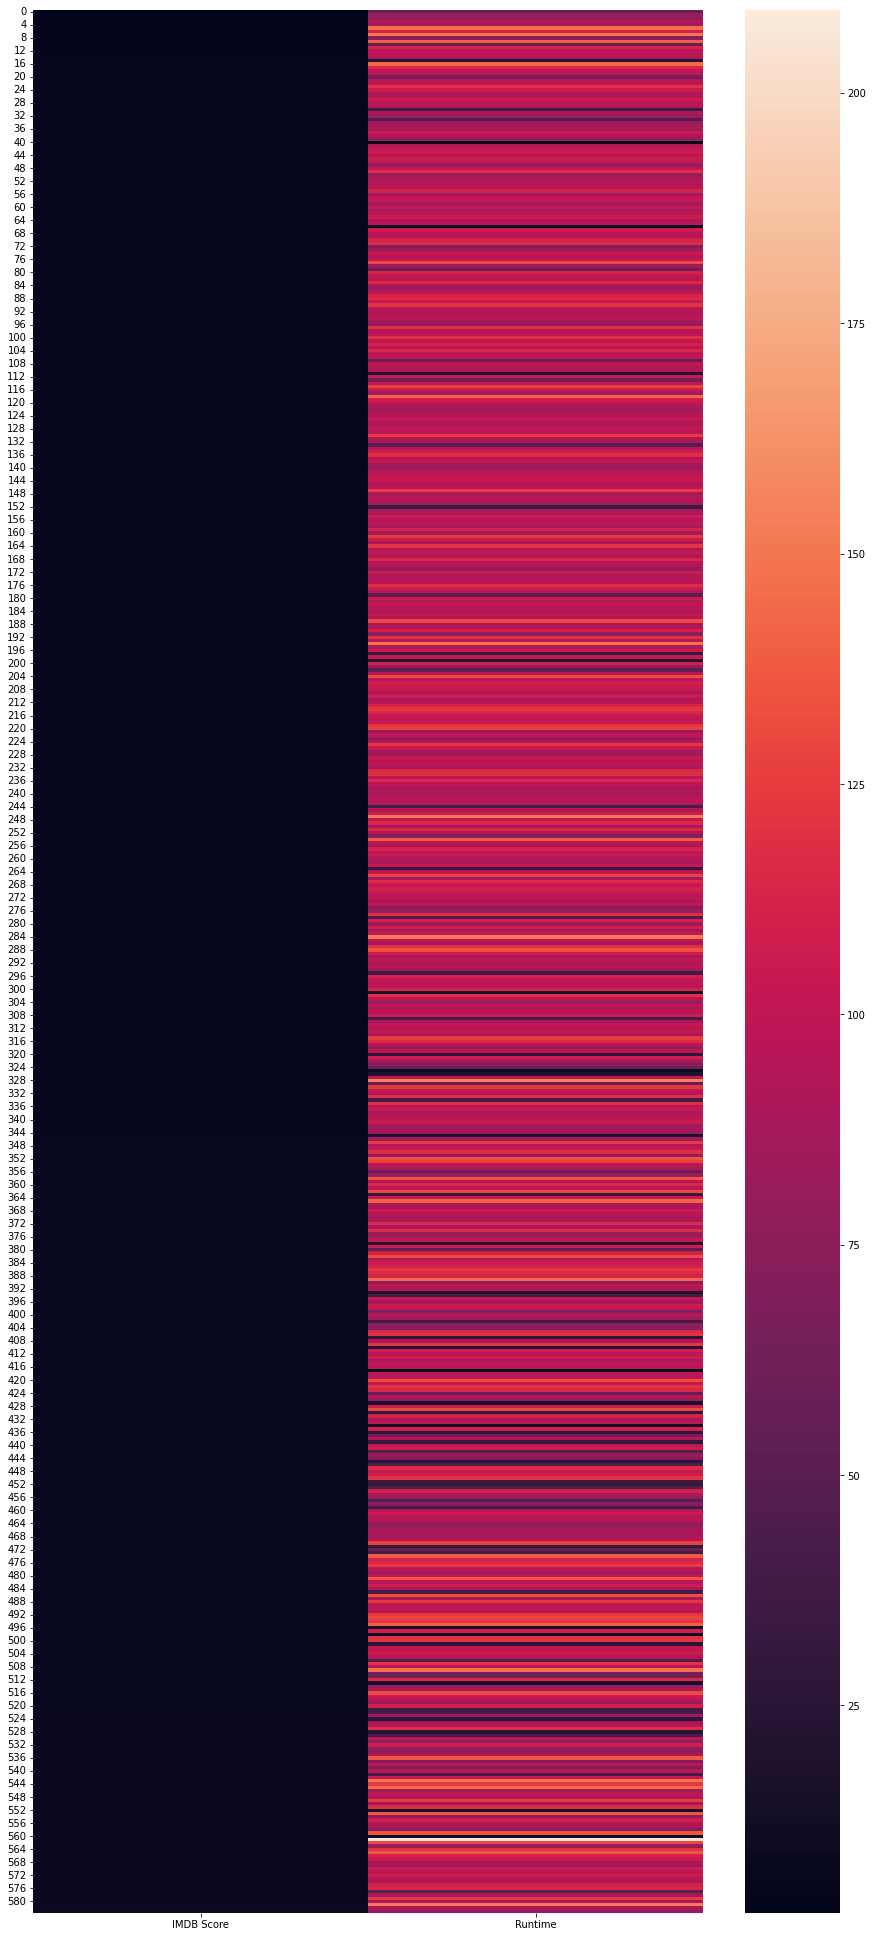

In [82]:
plt.figure(figsize=(15, 35))
sns.heatmap(df_korelasyon)

### 11. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [162]:
filmler = df.groupby("Genre")["IMDB Score"] # Filmeleri türüne göre grupladık
en_yuksek = filmler.max().reset_index(name = 'IMDB Puanı') # IMDB skoru en yüksek olanları yeni bir sutunda indexliyoruz
sonuc = en_yuksek.sort_values('IMDB Puanı', ascending=False).head(10)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'IMDB Puanı En Yüksek 10 Film Türü')

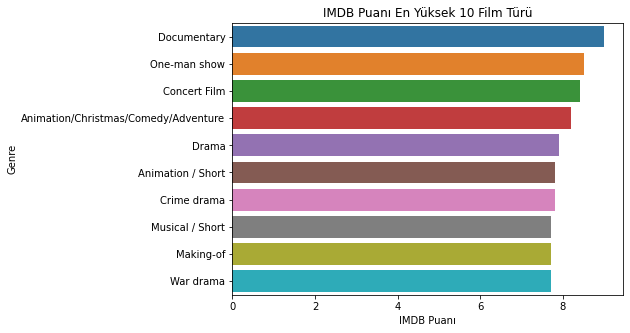

In [164]:
plt.figure(figsize=(7,5))
sns.barplot(sonuc["IMDB Puanı"], sonuc["Genre"])
plt.title("IMDB Puanı En Yüksek 10 Film Türü")

### 12. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [144]:
uzun_filmler = df.sort_values('Runtime', ascending=False).head(10)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'En uzun süreli 10 Film')

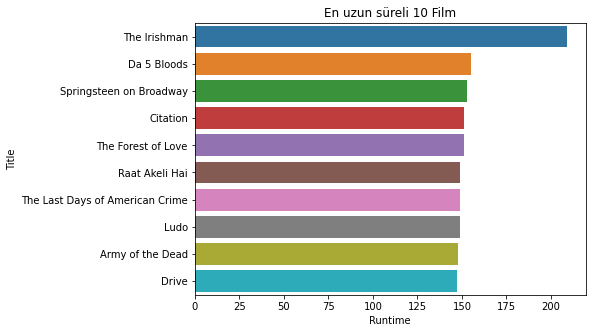

In [160]:
plt.figure(figsize=(7,5))
sns.barplot(uzun_filmler["Runtime"], uzun_filmler["Title"])
plt.title("En uzun süreli 10 Film")

### 13. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [150]:
cok_film = df["Yıl"].value_counts()
cok_film

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Yıl, dtype: int64

Text(0.5, 1.0, 'Yıllara Göre Film Sayıları')

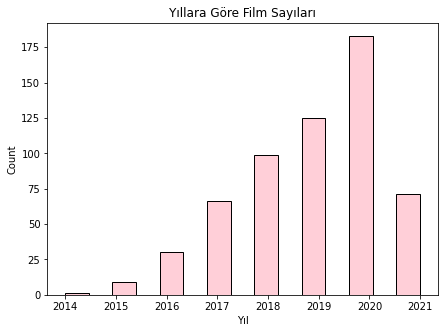

In [168]:
plt.figure(figsize=(7, 5))
sns.histplot(x='Yıl', data=df, bins=15, color='pink')
plt.title("Yıllara Göre Film Sayıları")

### 14. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

### 15. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

Text(0.5, 1.0, 'Dillere Göre En Düşük IMDB Ortalamaya Sahip Filmler')

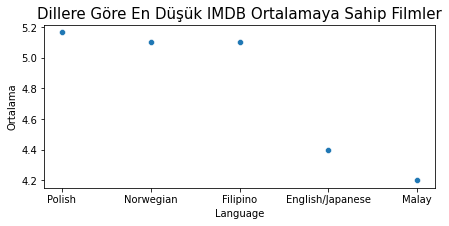

In [176]:
df_new= df.groupby('Language')['IMDB Score'].mean().reset_index(name='Ortalama').sort_values('Ortalama', ascending=False).tail()
plt.figure(figsize=(7,3))
sns.scatterplot(x='Language', y= 'Ortalama', data =df_new )
plt.title("Dillere Göre En Düşük IMDB Ortalamaya Sahip Filmler", fontsize=15)

<AxesSubplot:>

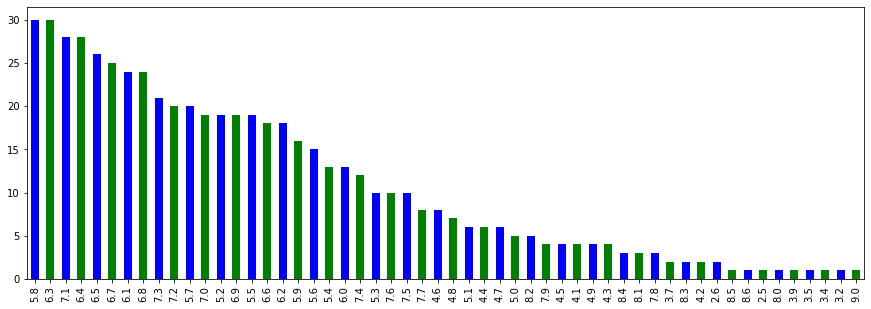

In [157]:
plt.figure(figsize=(15,5))
df['IMDB Score'].value_counts().plot.bar(color=['blue','green'])

<AxesSubplot:xlabel='Runtime', ylabel='IMDB Score'>

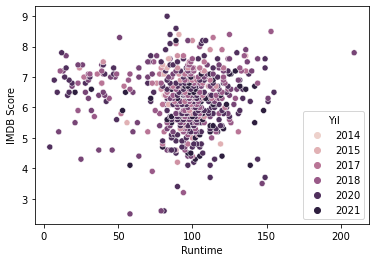

In [21]:
sns.scatterplot(x='Runtime', y= 'IMDB Score',hue='Yıl',data=df)

Text(0.5, 1.0, 'Average Rating based on Genre')

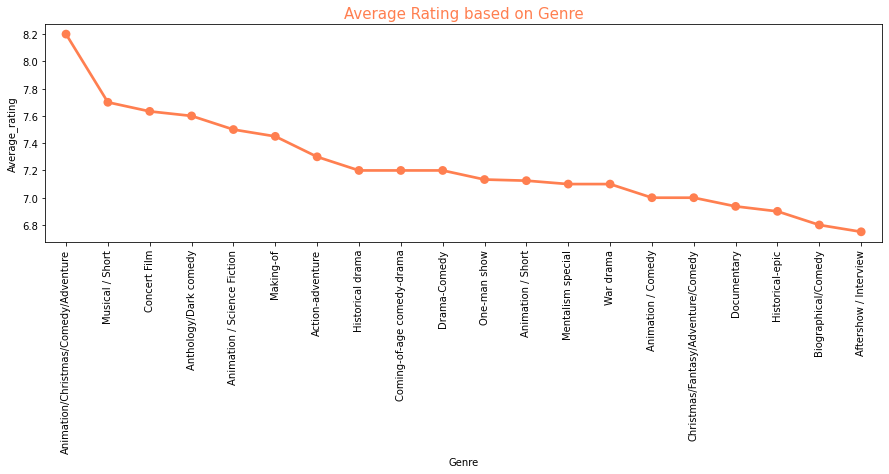

In [147]:
df_new= df.groupby('Genre')['IMDB Score'].mean().reset_index(name='Average_rating').\
sort_values('Average_rating', ascending=False).head(20)
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.pointplot(x='Genre', y= 'Average_rating', data =df_new, color='coral')
plt.title("Average Rating based on Genre", fontsize=15, color='Coral')

Text(0.5, 1.0, 'Average Rating based on Language')

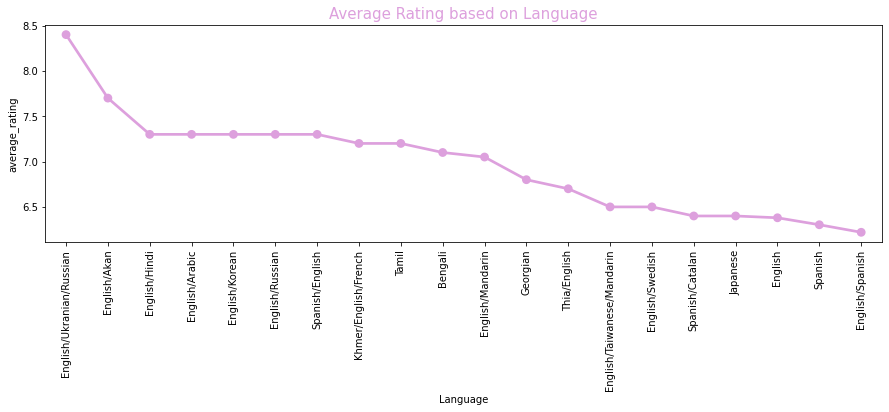

In [55]:
df["Date"] = pd.to_datetime(df.Premiere)
df["Date"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

In [56]:
df['Yıl'] = df['Date'].dt.year

In [57]:
df['Ay'] = df['Date'].dt.month
df['Gun'] = df['Date'].dt.day_of_week

In [58]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Yıl,Ay,Gun
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,4
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,3
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,4
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,4


In [59]:
top_20_movies = df[["IMDB Score", "Title", "Genre", "Yıl", "Language"]].sort_values(["IMDB Score"], ascending=False)[:20]
top_20_movies

,IMDB Score,Title,Genre,Yıl,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,2020,English
582,8.6,Emicida: AmarElo - It's All For Yesterday,Documentary,2020,Portuguese
581,8.5,Springsteen on Broadway,One-man show,2018,English
580,8.4,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015,English/Ukranian/Russian
579,8.4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018,English
578,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,2020,English
577,8.3,Dancing with the Birds,Documentary,2019,English
576,8.3,Cuba and the Cameraman,Documentary,2017,English
573,8.2,Klaus,Animation/Christmas/Comedy/Adventure,2019,English
571,8.2,13th,Documentary,2016,English


<AxesSubplot:xlabel='IMDB Score', ylabel='Title'>

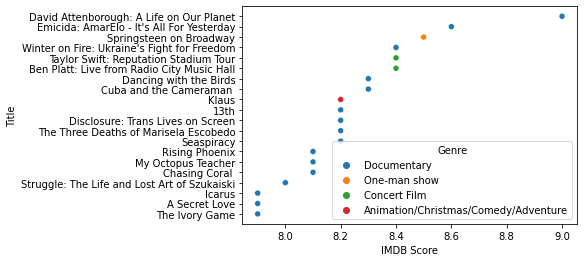

In [60]:
sns.scatterplot(data=top_20_movies, x="IMDB Score", y="Title", hue="Genre")

In [61]:
df.groupby("Genre")["IMDB Score"].mean().nlargest(10)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Name: IMDB Score, dtype: float64

<AxesSubplot:>

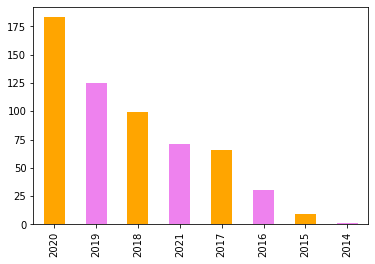

In [64]:
df['Yıl'].value_counts().plot.bar(color=['orange','violet'])

### En uzun soluklu filmler

In [42]:
df[df['Runtime']==df['Runtime'].max()]['Title']

561    The Irishman
Name: Title, dtype: object

In [43]:
df[df['Runtime']==df['Runtime'].max()]['Language']

561    English
Name: Language, dtype: object

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Gun'] = df['Gun'].map(dmap)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


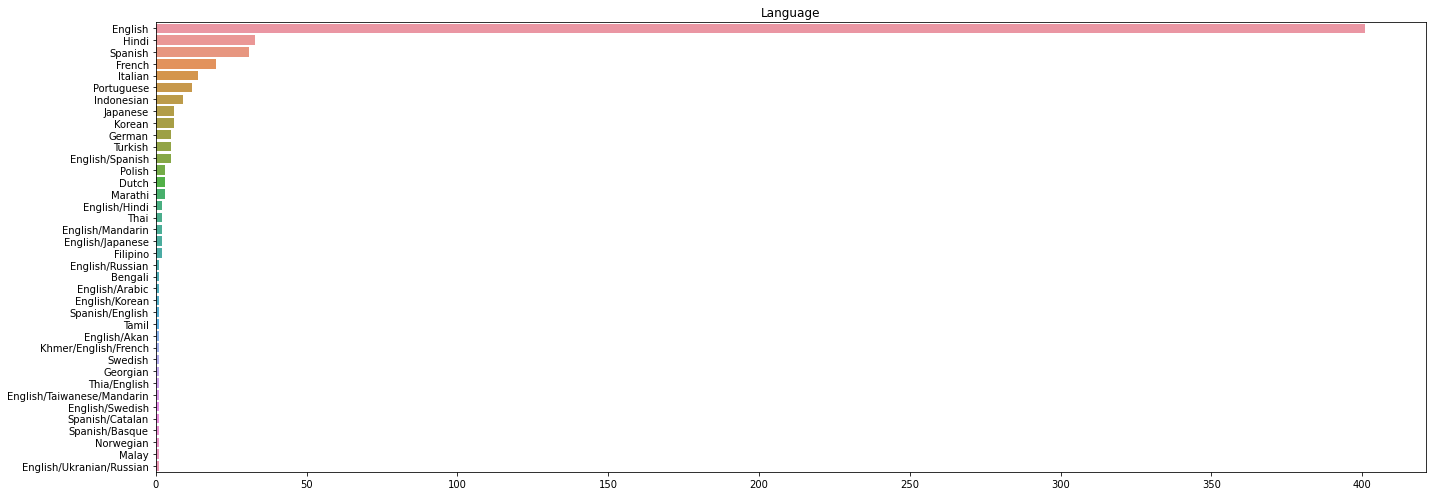

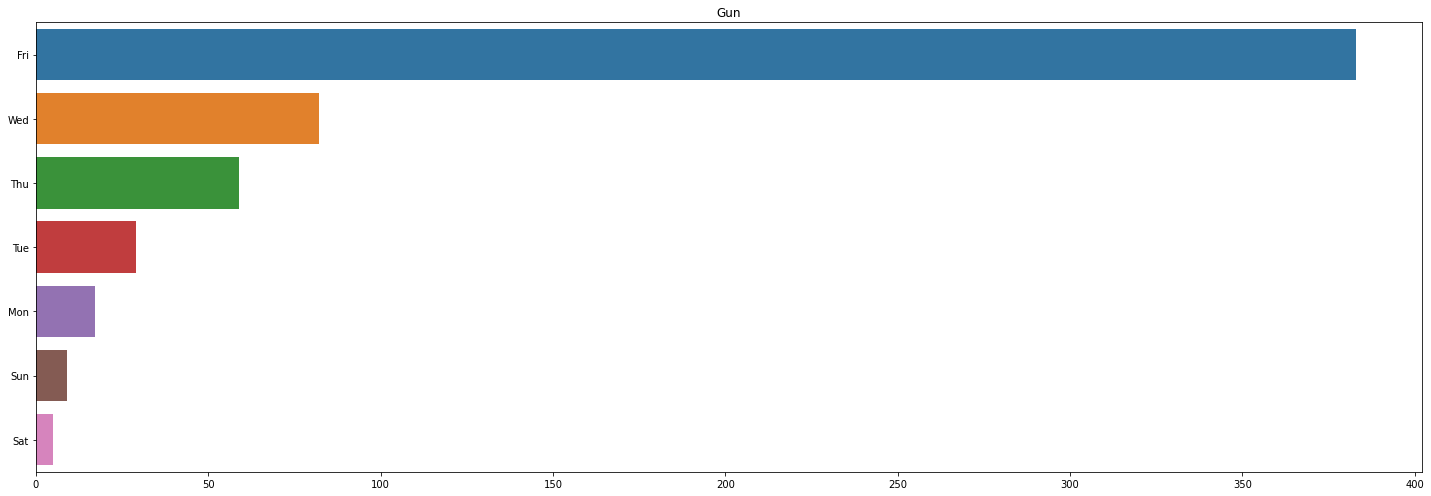

In [46]:
categorcial_variables = ['Language', 'Gun']
for col in categorcial_variables:
    plt.figure(figsize=(20,7))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

<AxesSubplot:xlabel='count', ylabel='IMDB Score'>

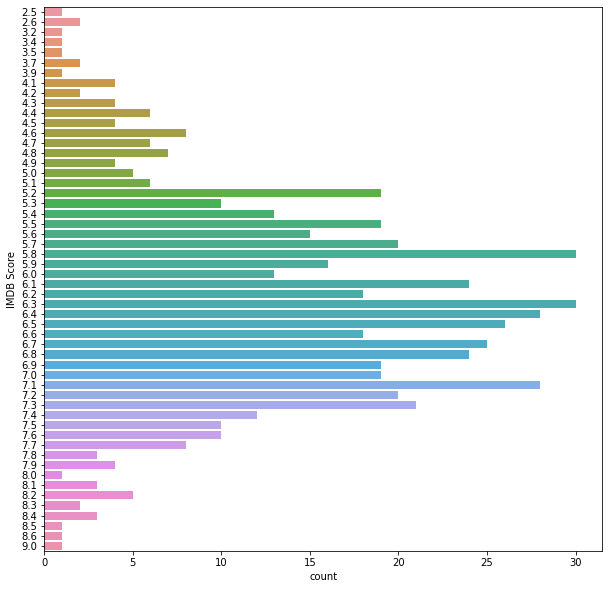

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['IMDB Score'])

<AxesSubplot:ylabel='IMDB Score'>

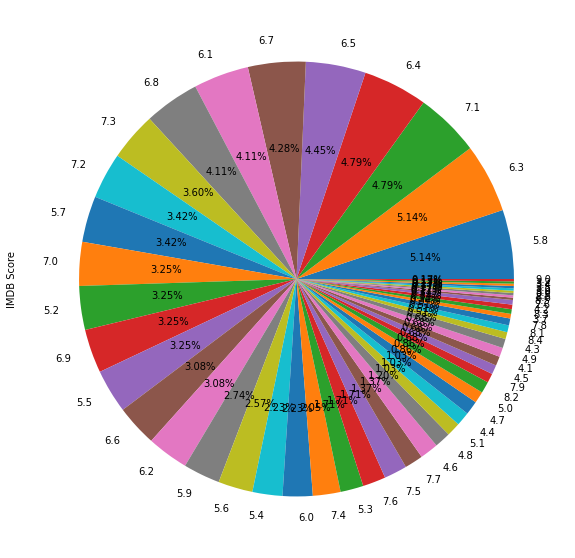

In [49]:
plt.figure(figsize=(10,10))
df['IMDB Score'].value_counts().plot.pie(autopct="%0.2f%%")

<AxesSubplot:ylabel='Yıl'>

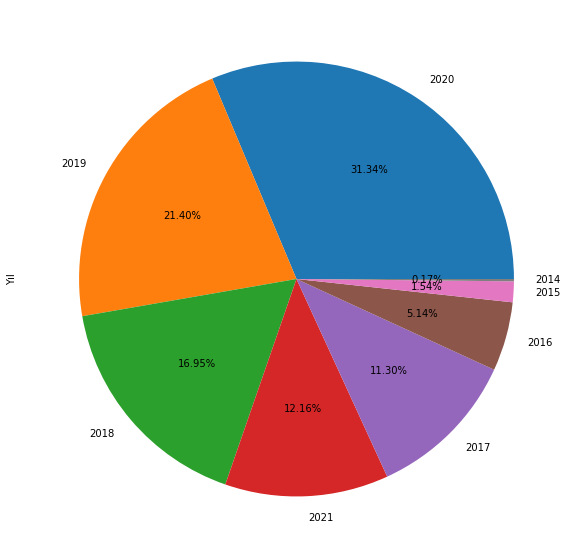

In [53]:
plt.figure(figsize=(10,10))
df['Yıl'].value_counts().plot.pie(autopct="%0.2f%%")

### Yeni bir veri sutunu oluşturma

In [17]:
def getReleaseYear(df):    
    for i in df.index:
        year = df.loc[i,'Premiere'][-5:]
        df.loc[i,'Yıl'] = year
    df['Yıl']= pd.to_numeric(df['Yıl'])

getReleaseYear(df)